# Lab05: Regularization

---

In this assignment, we would like to predict the success of shots made by basketball players in the NBA.

## 1. Prepare training data and validation data 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [3]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [4]:
X_train.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

X_train.shape

(60025, 8)

## 2. Try different models (and different hyperparameters ex. different degree, complexity).

### Model1: Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

train_pred = reg.predict(X_train)
valid_pred = reg.predict(X_valid)

train_acc = reg.score(X_train, y_train)
valid_acc = reg.score(X_valid, y_valid)

print(f"Train acc:{train_acc: .5f}, Valid acc{valid_acc: .5f}")

Train acc: 0.05176, Valid acc 0.05298


Degree:1, Train acc: 5.18%, Valid acc: 5.30%
Degree:2, Train acc: 6.65%, Valid acc: 6.35%
Degree:3, Train acc: 6.99%, Valid acc: 6.19%
Degree:4, Train acc: 6.53%, Valid acc: -1.67%
Best degree:2, Train acc: 6.65%, Valid acc: 6.35%


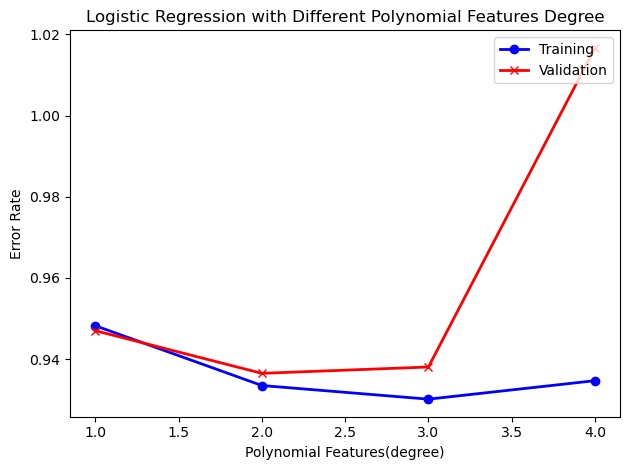

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

degree_list = list(range(1,5))
train_err_list = []
valid_err_list = []

for d in degree_list:
    pf = PolynomialFeatures(degree=d)
    X_train_p = pf.fit_transform(X_train)
    X_valid_p = pf.fit_transform(X_valid)
    
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train_p)
    X_valid_std = scaler.transform(X_valid_p)
    
    reg = LinearRegression()
    reg.fit(X_train_std, y_train.values.ravel())
    
    train_acc = reg.score(X_train_std, y_train)
    valid_acc = reg.score(X_valid_std, y_valid)
    
    train_err_list.append(1-train_acc)
    valid_err_list.append(1-valid_acc)
    
    print(f"Degree:{d}, Train acc: {train_acc*100:.2f}%, Valid acc: {valid_acc*100:.2f}%")
    
idx = np.argmin(valid_err_list)
print(f'Best degree:{degree_list[idx]}, Train acc: {(1-train_err_list[idx])*100:.2f}%, Valid acc: {(1-valid_err_list[idx])*100:.2f}%')

plt.plot(degree_list, train_err_list, 'bo-', label='Training', linewidth=2)
plt.plot(degree_list, valid_err_list, 'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('Logistic Regression with Different Polynomial Features Degree')
plt.xlabel('Polynomial Features(degree)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

### Mode2: Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

# Higher alpha values lead to a simpler model (lower complexity)
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

train_pred_r = ridge_reg.predict(X_train)
valid_pred_r = ridge_reg.predict(X_valid)

train_acc_r = ridge_reg.score(X_train, y_train)
valid_acc_r = ridge_reg.score(X_valid, y_valid)

print(f"Train acc: {train_acc_r:.5f}, Valid acc: {valid_acc_r:.5f}")

Train acc: 0.05176, Valid acc: 0.05298


Degree:1, Train acc: 5.18%, Valid acc: 5.30%
Degree:2, Train acc: 6.65%, Valid acc: 6.35%
Degree:3, Train acc: 7.06%, Valid acc: 6.35%
Degree:4, Train acc: 7.68%, Valid acc: 5.33%
Best degree:2, Train acc: 6.65%, Valid acc: 6.35%


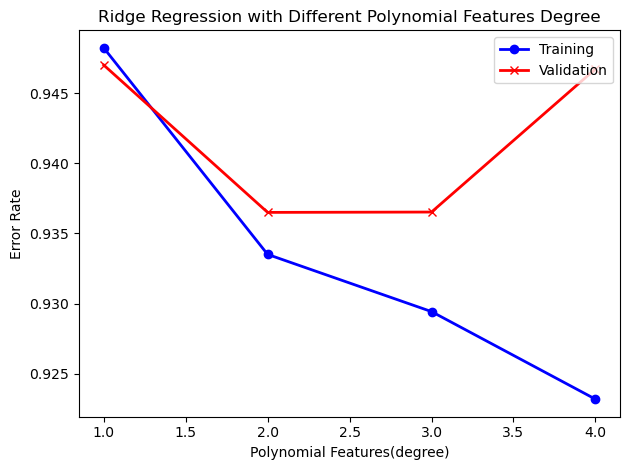

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

degree_list = list(range(1,5))
train_err_list = []
valid_err_list = []

for d in degree_list:
    pf = PolynomialFeatures(degree=d)
    X_train_p = pf.fit_transform(X_train)
    X_valid_p = pf.fit_transform(X_valid)
    
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train_p)
    X_valid_std = scaler.transform(X_valid_p)
    
    ridge_reg = Ridge(alpha=0.1)
    ridge_reg.fit(X_train_std, y_train.values.ravel())
    
    train_acc = ridge_reg.score(X_train_std, y_train)
    valid_acc = ridge_reg.score(X_valid_std, y_valid)
    
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    
    print(f"Degree:{d}, Train acc: {train_acc*100:.2f}%, Valid acc: {valid_acc*100:.2f}%")
    
idx = np.argmin(valid_err_list)
print(f'Best degree:{degree_list[idx]}, Train acc: {(1-train_err_list[idx])*100:.2f}%, Valid acc: {(1-valid_err_list[idx])*100:.2f}%')

plt.plot(degree_list, train_err_list, 'bo-', label='Training', linewidth=2)
plt.plot(degree_list, valid_err_list, 'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('Ridge Regression with Different Polynomial Features Degree')
plt.xlabel('Polynomial Features(degree)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

### Model3: LASSO

In [10]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

train_pred_l = lasso_reg.predict(X_train)
valid_pred_l = lasso_reg.predict(X_valid)

train_acc_l = lasso_reg.score(X_train, y_train)
valid_acc_l = lasso_reg.score(X_valid, y_valid)

print(f"Train acc: {train_acc_l:.5f}, Valid acc: {valid_acc_l:.5f}")

Train acc: 0.05121, Valid acc: 0.05230


Degree:1, Train acc: 4.92%, Valid acc: 5.05%
Degree:2, Train acc: 4.89%, Valid acc: 5.00%
Degree:3, Train acc: 4.89%, Valid acc: 5.00%
Degree:4, Train acc: 4.93%, Valid acc: 5.04%
Best degree:1, Train acc: 4.92%, Valid acc: 5.05%


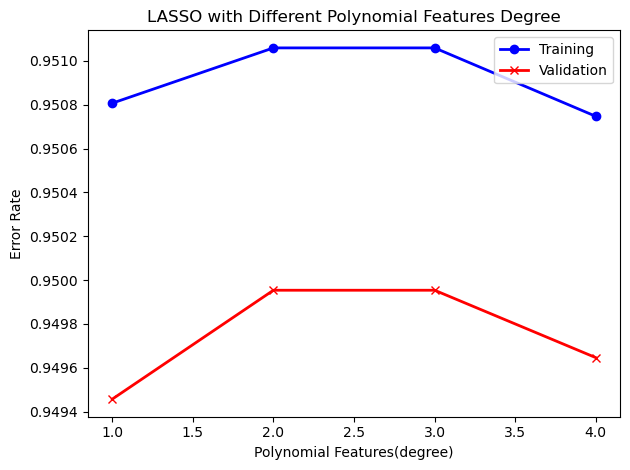

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

degree_list = list(range(1,5))
train_err_list = []
valid_err_list = []

for d in degree_list:
    pf = PolynomialFeatures(degree=d)
    X_train_p = pf.fit_transform(X_train)
    X_valid_p = pf.fit_transform(X_valid)
    
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train_p)
    X_valid_std = scaler.transform(X_valid_p)
    
    lasso_reg = Lasso(alpha=0.01)
    lasso_reg.fit(X_train_std, y_train.values.ravel())
    
    train_acc = lasso_reg.score(X_train_std, y_train)
    valid_acc = lasso_reg.score(X_valid_std, y_valid)
    
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    
    print(f"Degree:{d}, Train acc: {train_acc*100:.2f}%, Valid acc: {valid_acc*100:.2f}%")
    
idx = np.argmin(valid_err_list)
print(f'Best degree:{degree_list[idx]}, Train acc: {(1-train_err_list[idx])*100:.2f}%, Valid acc: {(1-valid_err_list[idx])*100:.2f}%')

plt.plot(degree_list, train_err_list, 'bo-', label='Training', linewidth=2)
plt.plot(degree_list, valid_err_list, 'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('LASSO with Different Polynomial Features Degree')
plt.xlabel('Polynomial Features(degree)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

### Model4: BayesianRidge

In [12]:
from sklearn.linear_model import BayesianRidge

bayesian_ridge_reg = BayesianRidge()
bayesian_ridge_reg.fit(X_train, y_train.values.ravel())

train_pred_br = bayesian_ridge_reg.predict(X_train)
valid_pred_br = bayesian_ridge_reg.predict(X_valid)

train_acc_br = bayesian_ridge_reg.score(X_train, y_train)
valid_acc_br = bayesian_ridge_reg.score(X_valid, y_valid)

print(f"Train acc: {train_acc_br:.5f}, Valid acc: {valid_acc_br:.5f}")

Train acc: 0.05175, Valid acc: 0.05297


Degree:1, Train acc: 5.18%, Valid acc: 5.30%
Degree:2, Train acc: 6.63%, Valid acc: 6.38%
Degree:3, Train acc: 6.85%, Valid acc: 6.33%
Degree:4, Train acc: 6.96%, Valid acc: 6.32%
Best degree:2, Train acc: 6.63%, Valid acc: 6.38%


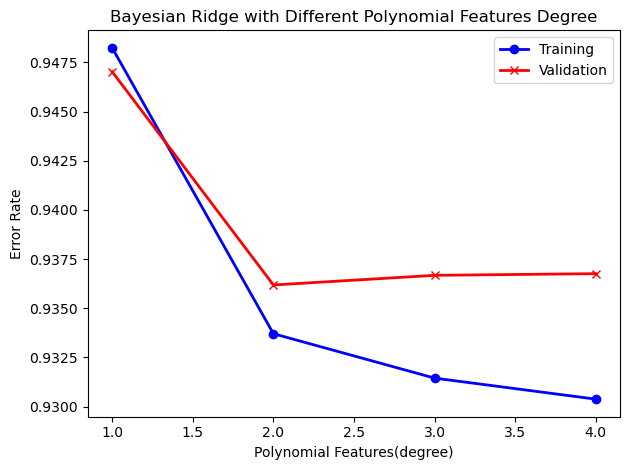

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

degree_list = list(range(1,5))
train_err_list = []
valid_err_list = []

for d in degree_list:
    pf = PolynomialFeatures(degree=d)
    X_train_p = pf.fit_transform(X_train)
    X_valid_p = pf.fit_transform(X_valid)
    
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train_p)
    X_valid_std = scaler.transform(X_valid_p)
    
    bayesian_ridge_reg = BayesianRidge()
    bayesian_ridge_reg.fit(X_train_std, y_train.values.ravel())
    
    train_acc = bayesian_ridge_reg.score(X_train_std, y_train)
    valid_acc = bayesian_ridge_reg.score(X_valid_std, y_valid)
    
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    
    print(f"Degree:{d}, Train acc: {train_acc*100:.2f}%, Valid acc: {valid_acc*100:.2f}%")
    
idx = np.argmin(valid_err_list)
print(f'Best degree:{degree_list[idx]}, Train acc: {(1-train_err_list[idx])*100:.2f}%, Valid acc: {(1-valid_err_list[idx])*100:.2f}%')

plt.plot(degree_list, train_err_list, 'bo-', label='Training', linewidth=2)
plt.plot(degree_list, valid_err_list, 'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('Bayesian Ridge with Different Polynomial Features Degree')
plt.xlabel('Polynomial Features(degree)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

### Model5: SGDClassifier

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_valid_std = scaler.transform(X_valid)

# Create an instance of SGDClassifier
sgd_classifier = SGDClassifier()

# Fit the SGDClassifier model using the standardized training data
sgd_classifier.fit(X_train_std, y_train.values.ravel())

# Predict using the SGDClassifier model
train_pred_sgd = sgd_classifier.predict(X_train_std)
valid_pred_sgd = sgd_classifier.predict(X_valid_std)

# Calculate the accuracy for training and validation sets
train_acc_sgd = sgd_classifier.score(X_train_std, y_train)
valid_acc_sgd = sgd_classifier.score(X_valid_std, y_valid)

# Print the accuracy scores
print(f"Train acc: {train_acc_sgd:.5f}, Valid acc: {valid_acc_sgd:.5f}")

Train acc: 0.60070, Valid acc: 0.60297


Degree:1, Train acc: 60.15%, Valid acc: 60.63%
Degree:2, Train acc: 60.99%, Valid acc: 60.51%
Degree:3, Train acc: 60.78%, Valid acc: 60.57%
Degree:4, Train acc: 60.66%, Valid acc: 60.33%
Degree:5, Train acc: 56.37%, Valid acc: 54.92%
Best degree:1, Train acc: 60.15%, Valid acc: 60.63%


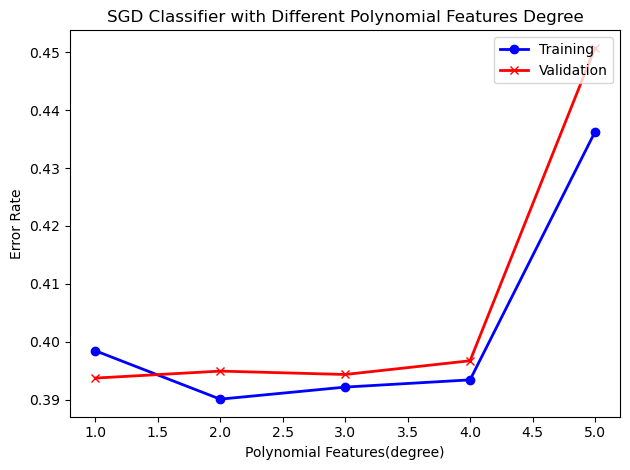

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

degree_list = list(range(1,6))
train_err_list = []
valid_err_list = []

for d in degree_list:
    pf = PolynomialFeatures(degree=d)
    X_train_p = pf.fit_transform(X_train)
    X_valid_p = pf.fit_transform(X_valid)
    
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train_p)
    X_valid_std = scaler.transform(X_valid_p)
    
    sgd_classifier = SGDClassifier()
    sgd_classifier.fit(X_train_std, y_train.values.ravel())
    
    train_acc = sgd_classifier.score(X_train_std, y_train)
    valid_acc = sgd_classifier.score(X_valid_std, y_valid)
    
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    
    print(f"Degree:{d}, Train acc: {train_acc*100:.2f}%, Valid acc: {valid_acc*100:.2f}%")
    
idx = np.argmin(valid_err_list)
print(f'Best degree:{degree_list[idx]}, Train acc: {(1-train_err_list[idx])*100:.2f}%, Valid acc: {(1-valid_err_list[idx])*100:.2f}%')

plt.plot(degree_list, train_err_list, 'bo-', label='Training', linewidth=2)
plt.plot(degree_list, valid_err_list, 'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('SGD Classifier with Different Polynomial Features Degree')
plt.xlabel('Polynomial Features(degree)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

### Model6: LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_valid_std = scaler.transform(X_valid)

# Create an instance of Logistic Regression
logistic_reg = LogisticRegression(C = 0.1)

# Fit the Logistic Regression model using the standardized training data
logistic_reg.fit(X_train_std, y_train.values.ravel())

# Predict using the Logistic Regression model
train_pred_lr = logistic_reg.predict(X_train_std)
valid_pred_lr = logistic_reg.predict(X_valid_std)

# Calculate the accuracy for training and validation sets
train_acc_lr = logistic_reg.score(X_train_std, y_train)
valid_acc_lr = logistic_reg.score(X_valid_std, y_valid)

# Print the accuracy scores
print(f"Train acc: {train_acc_lr:.5f}, Valid acc: {valid_acc_lr:.5f}")


Train acc: 0.60826, Valid acc: 0.60942


Degree:1, Train acc: 60.83%, Valid acc: 60.94%
Degree:2, Train acc: 61.59%, Valid acc: 61.38%
Degree:3, Train acc: 61.83%, Valid acc: 61.33%
Degree:4, Train acc: 62.01%, Valid acc: 61.23%
Degree:5, Train acc: 62.26%, Valid acc: 61.07%
Best degree:2, Train acc: 61.59%, Valid acc: 61.38%


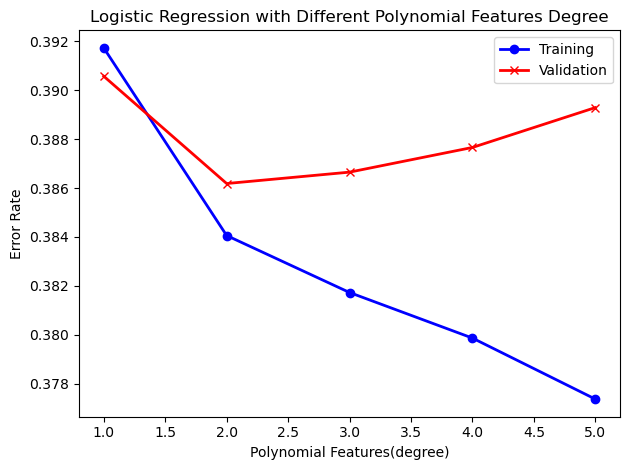

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

degree_list = list(range(1,6))
train_err_list = []
valid_err_list = []

for d in degree_list:
    pf = PolynomialFeatures(degree=d)
    X_train_p = pf.fit_transform(X_train)
    X_valid_p = pf.fit_transform(X_valid)
    
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train_p)
    X_valid_std = scaler.transform(X_valid_p)
    
    logistic_reg = LogisticRegression(C = 0.1, max_iter=10000)
    logistic_reg.fit(X_train_std, y_train.values.ravel())
    
    train_pred = logistic_reg.predict(X_train_std)
    valid_pred = logistic_reg.predict(X_valid_std)
    
    train_acc = logistic_reg.score(X_train_std, y_train)
    valid_acc = logistic_reg.score(X_valid_std, y_valid)
    
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    
    print(f"Degree:{d}, Train acc: {train_acc*100:.2f}%, Valid acc: {valid_acc*100:.2f}%")
    
idx = np.argmin(valid_err_list)
print(f'Best degree:{degree_list[idx]}, Train acc: {(1-train_err_list[idx])*100:.2f}%, Valid acc: {(1-valid_err_list[idx])*100:.2f}%')

plt.plot(degree_list, train_err_list, 'bo-', label='Training', linewidth=2)
plt.plot(degree_list, valid_err_list, 'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('Logistic Regression with Different Polynomial Features Degree')
plt.xlabel('Polynomial Features(degree)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

### Find top 3 features

In [26]:
# # Obtain the coefficients (weights) from the logistic regression model
# coefficients = logistic_reg.coef_[0]

# # Pair each feature with its coefficient and sort based on absolute magnitude
# feature_coefficient = [(feature, abs(coef)) for feature, coef in zip(X_train.columns, coefficients)]
# feature_coefficient.sort(key=lambda x: x[1], reverse=True)

# # Get the names of the top three important features
# top_features = [feature for feature, _ in feature_coefficient[:]]

# # Print the top three important features and their corresponding coefficients
# print("Features coefficient:")
# for feature, coef in feature_coefficient[:]:
#     print(f"{feature:15}: {coef:.5f}")

In [19]:
import numpy as np

pf = PolynomialFeatures(degree=2)
X_train_p = pf.fit_transform(X_train)
X_valid_p = pf.fit_transform(X_valid)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_p)
X_valid_std = scaler.transform(X_valid_p)

logistic_reg = LogisticRegression(C = 0.1, max_iter=10000)
logistic_reg.fit(X_train_std, y_train.values.ravel())

values = logistic_reg.coef_[0]

feature_names = X_train.columns.to_numpy()

# Sort the values and get the corresponding indices
sorted_indices = np.argsort(values)[::-1]
sorted_values = values[sorted_indices]

top3 = []

# Print the sorted indices and values
print("Feature         Importance")
for i, value in zip(sorted_indices, sorted_values):
    if i >= 1 and i <= 8:
        top3.append(feature_names[i-1])
        print(f"{feature_names[i-1]:15} {value:<.2f}")
        
top3 = top3[:3] # ['CLOSE_DEF_DIST', 'SHOT_CLOCK', 'PTS_TYPE']

Feature         Importance
CLOSE_DEF_DIST  0.80
SHOT_CLOCK      0.29
PTS_TYPE        0.15
PERIOD          0.10
TOUCH_TIME      0.05
GAME_CLOCK      -0.03
DRIBBLES        -0.24
SHOT_DIST       -0.54


## 3. Show the accuracy with only top-3 features

In [20]:
from sklearn.model_selection import train_test_split

top3 = ['SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK']

X_new = X_train[top3]
X_train, X_valid, y_train, y_valid = train_test_split(X_new, y_train, test_size=0.3, random_state=0)

pf = PolynomialFeatures(degree=2)
X_train_p = pf.fit_transform(X_train)
X_valid_p = pf.fit_transform(X_valid)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_p)
X_valid_std = scaler.transform(X_valid_p)

logistic_reg = LogisticRegression(C = 0.1, max_iter=10000)
logistic_reg.fit(X_train_std, y_train.values.ravel())

train_pred = logistic_reg.predict(X_train_std)
valid_pred = logistic_reg.predict(X_valid_std)

train_acc = logistic_reg.score(X_train_std, y_train)
valid_acc = logistic_reg.score(X_valid_std, y_valid)

train_err_list.append(1 - train_acc)
valid_err_list.append(1 - valid_acc)

print(f"Degree:2, Train acc: {train_acc*100:.2f}%, Valid acc: {valid_acc*100:.2f}%")

Degree:2, Train acc: 61.53%, Valid acc: 60.90%


In [25]:
X_test = pd.read_csv('./data/X_test.csv')
X_test = X_test[top3]

pf = PolynomialFeatures(degree=2)
X_test_p = pf.fit_transform(X_test)

scaler = StandardScaler()
X_test_std = scaler.fit_transform(X_test_p)

y_pred = logistic_reg.predict(X_test_std)

df = pd.DataFrame(y_pred, columns=y_train.columns)
df.to_csv('Lab05_110062619_y_pred.csv', index=False)

## 4. A brief report of what you have done in this assignment

1. 將X_train切成training data和validation data，比例為7:3。
2. 套用sci-kit的StandardScaler將特徵進行標準化(即Z-score)。
3. 套用sci-kit的linear model來找適合的model，發現logistic regression model的準確率最高。
4. 套用sci-kit的PolynomialFeatures來生成原始特徵的多項式組合，主要是拿來擴展特徵空間。
5. 測試了一下degree=1 to 5,發現degree=2的acc最好，所以決定用logistic regression model，degree=2。
6. 之後透過LogisticRegression的.coef_[0]找出個特徵的weight，並藉此去找回原本top3 features。
7. 只用這三個features去重新predict，發現跟原本用10個特徵差不多，然後最後產生作業要求的y_pred。